In [67]:
import os
import gc
import json
import time
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
try:
    import tweepy
except ImportError:
    os.system('pip install tweepy')
    import tweepy 
from tweepy import OAuthHandler


In [303]:
def check(df,col,val):
    return df[df[col] == val]

## Gathering Data

In [7]:
twitter_enhanced_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
csv = requests.get(twitter_enhanced_url)
with open('twitter-archive-enhanced.csv',mode='wb') as outfile:
    outfile.write(csv.content)

In [8]:
image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
tsv = requests.get(image_pred_url)
with open('image_prediction.tsv',mode='wb') as outfile:
    outfile.write(tsv.content)

In [12]:
tweet_ids = tweet_data.tweet_id.values
len(tweet_ids)

2356

In [24]:
#Downloading the extra data 
#It downloads only if its not already downloaded
#Here in this case i already downloaded so the variable `ALREADY_DOWNLOADED` is True
#if you want to download it change the variable `ALREADY_DOWNLOADED` to False
ALREADY_DOWNLOADED = True
if not ALREADY_DOWNLOADED:
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'
    
    auth = OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth,wait_on_rate_limit=True)
    
    count = 0
    fails_dict = {}
    start = time.time()
    with open('tweet_json.txt',mode='w') as outfile:
        for tweet_id in tqdm(tweet_ids):
            try:
                tweet = api.get_status(tweet_id,tweet_mode='extended')
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                fails_dict[tweet_id] = e
                pass
    end = time.time()
    print(f'Time taken {end-start} seconds')

Time taken 2416.523969888687 seconds


In [26]:
#Creating a list and appending the specific json key value to create a dataframe
df_list = []
with open('tweet_json.txt',mode='r') as infile:
    for files in tqdm(infile.readlines()):
        tweet_json = json.loads(files)
        favorite_count = tweet_json['favorite_count']
        retweet_count = tweet_json['retweet_count']
        tweet_id = tweet_json['id']
        df_list.append({'favorite_count':favorite_count,
                       'retweet_count':retweet_count,
                       'id':tweet_id})

In [28]:
#First 2 elements of the extracted json file
df_list[:2]

[{'favorite_count': 36421, 'retweet_count': 7744, 'id': 892420643555336193},
 {'favorite_count': 31363, 'retweet_count': 5736, 'id': 892177421306343426}]

In [31]:
#Save the additional data
twitter_additional_data = pd.DataFrame(df_list)
twitter_additional_data.to_csv('twitter_additional_data.csv',index=False)

In [477]:
#Reading all the required data
archive_data = pd.read_csv('twitter-archive-enhanced.csv',sep=',')
image_data = pd.read_csv('image_prediction.tsv',sep='\t')

## Assessing Data

### Visual Assessment

In [64]:
archive_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
519,810284430598270976,NaN,NaN,2016-12-18 00:43:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's a father. A very good fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810284430...,13,10,Phil,None,None,None,None
474,816091915477250048,NaN,NaN,2017-01-03 01:20:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Comet. He's a Wild Estonian Poofer. Su...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816091915...,12,10,Comet,None,None,None,None
1469,694183373896572928,NaN,NaN,2016-02-01 15:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She realized mid hug that she's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694183373...,9,10,Lola,None,None,None,None
613,796865951799083009,NaN,NaN,2016-11-11 00:03:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He's just checking on you. Nifty ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796865951...,12,10,Tyr,None,None,None,None
1817,676603393314578432,NaN,NaN,2015-12-15 03:23:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Godzilla pupper. He had a ruff childho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676603393...,9,10,Godzilla,None,None,pupper,None


In [46]:
image_data.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,1.986610e-02,True
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False
1853,840696689258311684,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,0.841768,False,rule,0.007087,False,envelope,6.820300e-03,False
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,4.324510e-03,True
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,1.168640e-01,True


In [47]:
twitter_additional_data.sample(5)

,favorite_count,id,retweet_count
1854,2648,675015141583413248,1159
1187,5466,715360349751484417,1563
1027,7095,742534281772302336,3589
1330,2586,703631701117943808,679
1908,1096,674019345211760640,294


### Programmatic Assessment

1) Twitter archive data

In [65]:
archive_data.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. He's sexually confused. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,None,None,None,None
439,819952236453363712,NaN,NaN,2017-01-13 17:00:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,NaN,NaN,NaN,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
1676,682088079302213632,NaN,NaN,2015-12-30 06:37:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,NaN,NaN,NaN,https://vine.co/v/iqMjlxULzbn,12,10,None,None,None,None,None
1471,693993230313091072,NaN,NaN,2016-02-01 03:04:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",These lil fellas are the best of friends. 12/1...,NaN,NaN,NaN,https://vine.co/v/i5ETazP5hrm,12,10,None,None,None,None,None
1392,700062718104104960,NaN,NaN,2016-02-17 21:02:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eazy-E. He's colorful af. Must be rare...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700062718...,6,10,Eazy,None,None,None,None
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,None,None,None
1927,674051556661161984,NaN,NaN,2015-12-08 02:23:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She knits. Specializes in tobogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674051556...,10,10,Lucy,None,None,None,None


In [56]:
#Shape of the data
print(f'Number of rows    : {archive_data.shape[0]}\nNumber of columns : {archive_data.shape[1]}')

Number of rows    : 2356
Number of columns : 17


In [57]:
#Description of data
archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [60]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

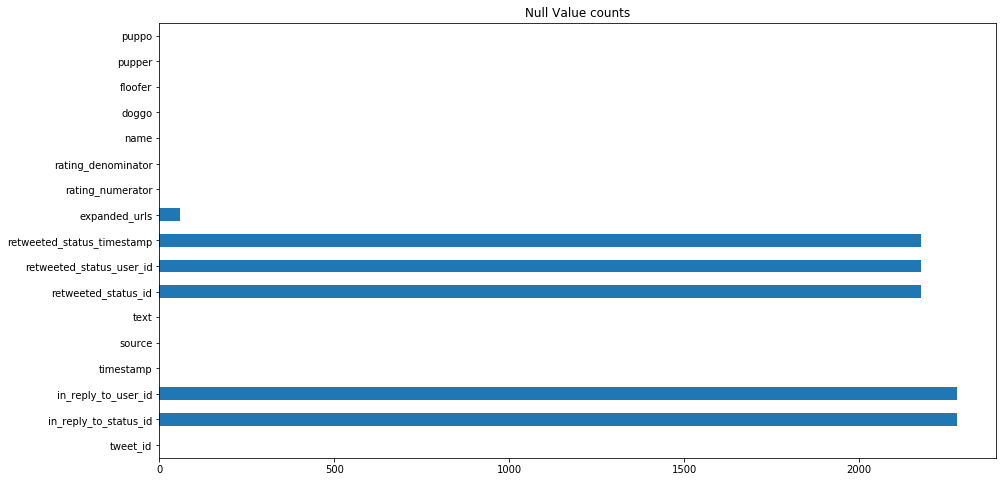

In [71]:
_=plt.figure(figsize=(15,8));
archive_data.isnull().sum().plot(kind='barh')
_=plt.title("Null Value counts");

In [100]:
#Checking for duplicated data
archive_data[archive_data.duplicated()]
print(f'Shape : {archive_data[archive_data.duplicated()].shape}')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Shape : (0, 17)


In [74]:
#Source columns
print(f"Num unique values in `source` : {archive_data['source'].nunique()}")
archive_data['source'].unique()

Num unique values in `source` : 4


array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [77]:
#Rating columns
# 1) Denominator column
print('Denominator Column')
archive_data['rating_denominator'].unique()

Denominator Column


array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [78]:
# 2) Numerator column
print('Numerator Column')
archive_data['rating_numerator'].unique()

Numerator Column


array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [83]:
#Expanded url column
archive_data['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [107]:
print(f"Number of rows to be removed inorder to get the original tweet \n{archive_data.shape[0] - archive_data['retweeted_status_id'].isnull().sum()}")

Number of rows to be removed inorder to get the original tweet 
181


2) Image data

In [88]:
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


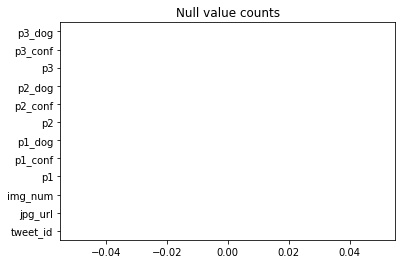

In [95]:
#Null counts
image_data.isnull().sum().plot(kind='barh');
plt.title('Null value counts');

In [101]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [104]:
#Checking for duplicated data
image_data[image_data.duplicated()]
print(f'Shape : {image_data[image_data.duplicated()].shape}')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Shape : (0, 12)


3) twitter_additional_data

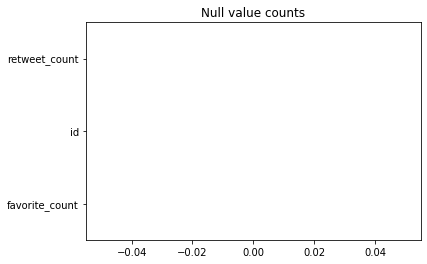

In [93]:
twitter_additional_data.isnull().sum().plot(kind='barh');
plt.title('Null value counts');

In [92]:
twitter_additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
id                2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [106]:
#Checking for duplicated data
twitter_additional_data[twitter_additional_data.duplicated()]
print(f'Shape  :{twitter_additional_data[twitter_additional_data.duplicated()].shape}')

,favorite_count,id,retweet_count


Shape  :(0, 3)


#### Summary
##### twiiter archive data
1. From the null value bar plot the columns `puppo`,`pupper`,`floofer`,`doggo` has None as null values (we need to change the None to np.nan)
2. `timestamp` has string value (Need to change into datetime dtype)
3. `Retweeted_status_timestamp` has a string value (Change to datetime dtype)
4. `source` column has 2 types of data (href link and href text value). Need to seperate these values to different columns
5. `Rating_denominator` has values less than 0. It should be greater than or equal to 10 (Clip these values)
6. `Rating_numerator` has values less than 0. It should be atleast 10
7. `Name` columns has values like "a","as","there","one"
8. Remove the columns that have no `retweet_count`

##### Image prediction data
1) The id column should be str not int

##### Twitter additional data
1) The id column should be str not int

## Cleaning Data

Twitter Archive Data

In [478]:
#Changing to datetime column
archive_data['timestamp'] = pd.to_datetime(archive_data['timestamp'])
archive_data['retweeted_status_timestamp'] = pd.to_datetime(archive_data['retweeted_status_timestamp'])

In [479]:
#Replacing None value to np.nan
archive_data[['puppo','pupper','floofer','doggo']] = archive_data[['puppo','pupper','floofer','doggo']].replace('None',np.nan)

In [480]:
#Since source column has two values so seperated columns for those
archive_data['source_link'] = archive_data['source'].apply(lambda x:re.search('\"(.*?)\"',x).group())
archive_data['source_text'] = archive_data['source'].apply(lambda x:re.search('\>(.*?)\<',x).group()[1:-1])

In [481]:
#Denominator shoould be greater than or equal to 10
archive_data['rating_denominator'] = np.where(archive_data['rating_denominator']<10,10,archive_data['rating_denominator'])

In [482]:
#Numerator should be greater than  denominator
archive_data['rating_numerator'] = np.where(archive_data['rating_numerator']<10,10,archive_data['rating_numerator'])

In [483]:
#Removing erraneous names
real_names = [x for x in archive_data['name'].unique() if x not in ['a', 'one', 'my', 'this','mad','O','all','by','not']]
archive_data = archive_data.loc[archive_data['name'].isin(real_names)]
archive_data['name'].replace('None',np.nan,inplace=True)

In [484]:
#Drooping the rows that only have original tweet
archive_data = archive_data[archive_data['retweeted_status_id'].isnull()]
archive_data = archive_data.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                          'in_reply_to_status_id','in_reply_to_user_id','source',
                                          'expanded_urls','source_link','source_text'])
archive_data.shape  

(2108, 10)

In [485]:
#We can insert the day-month-year additional column from timestamp
archive_data['day'] = archive_data['timestamp'].dt.day
archive_data['month'] = archive_data['timestamp'].dt.month
archive_data['year'] = archive_data['timestamp'].dt.year
archive_data['hour'] = archive_data['timestamp'].dt.hour
archive_data['minute'] = archive_data['timestamp'].dt.minute
archive_data['seconds'] = archive_data['timestamp'].dt.second
archive_data = archive_data[['tweet_id','year','month','day','hour','minute','seconds','text','rating_numerator',
                             'rating_denominator','name','doggo','floofer','pupper','puppo']]

In [486]:
archive_data.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)
archive_data.shape

(2108, 11)

In [518]:
archive_data = archive_data.dropna()
archive_data.isnull().sum()

tweet_id              0
year                  0
month                 0
day                   0
hour                  0
minute                0
seconds               0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
dtype: int64

In [519]:
archive_data_clean = archive_data.copy()

Image Prediction data

In [488]:
image_data.head()
image_data.shape

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


(2075, 12)

In [489]:
#Removing the duplicated `jpg_url` value column
image_data = image_data.drop_duplicates(subset='jpg_url',keep='last')
image_data.shape

(2009, 12)

In [490]:
dog_list = []
conf_level = []
for idx, rows in tqdm(image_data.iterrows()):
    if(rows['p3_dog'] == True):
        dog_list.append(rows['p3'])
        conf_level.append(rows['p3_conf'])
    elif(rows['p2_dog'] == True):
        dog_list.append(rows['p2'])
        conf_level.append(rows['p2_conf'])
    elif(rows['p1_dog'] == True):
        dog_list.append(rows['p1'])
        conf_level.append(rows['p1_conf'])
    else:
        dog_list.append('Error')
        conf_level.append('Error')

In [491]:
image_data['dog_type'] = dog_list
image_data['conf_level'] = conf_level

In [493]:
rem_cols = [f'p{x},p{x}_conf,p{x}_dog' for x in range(1,4)]
rem_cols = [x.split(',') for x in rem_cols]
rem_cols = list(np.array(rem_cols).flatten()) + ['img_num']
image_data.drop(columns=rem_cols,inplace=True)

In [494]:
image_data = image_data[image_data['dog_type'] != 'Error']

In [495]:
image_data_clean = image_data.copy()

Twitter Additional Data

In [496]:
twitter_additional_data.rename(columns={'id':'tweet_id'},inplace=True)
twitter_additional_clean = twitter_additional_data.copy()

### Tidiness


#### Change tweet_id to type int64

In [ ]:
assert archive_data_clean['tweet_id'].dtype == image_data_clean['tweet_id'].dtype == twitter_additional_clean['tweet_id'].dtype, 'dtypes not same'

##### Merging the clean data

In [521]:
#Extracting similar tweet if for 3 tables
index = set(set(archive_data_clean.tweet_id.unique()).intersection(set(image_data.tweet_id.unique()))).intersection(set(twitter_additional_clean.tweet_id.unique()))
archive_data_clean = archive_data_clean.loc[archive_data_clean['tweet_id'].isin(index)]
image_data_clean = image_data_clean.loc[image_data_clean['tweet_id'].isin(index)]
twitter_additional_clean = twitter_additional_clean.loc[twitter_additional_clean['tweet_id'].isin(index)]

In [522]:
df_twit = archive_data_clean.merge(image_data,on='tweet_id',how='left')
df_twit = df_twit.merge(twitter_additional_clean,on='tweet_id',how='left')

### Storing the clean dataframe

In [526]:
df_twit.to_csv('twitter_archive_master.csv',index=False)

### Analysis

In [528]:
df_twit['rating'] = (10*df_twit['rating_numerator']) / df_twit['rating_denominator']
df_twit.head()

,tweet_id,year,month,day,hour,minute,seconds,text,rating_numerator,rating_denominator,name,jpg_url,dog_type,conf_level,favorite_count,retweet_count,rating
0,892177421306343426,2017,8,1,0,17,27,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,0.0689569,31363,5736,13.0
1,891815181378084864,2017,7,31,0,18,3,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,kelpie,0.0313789,23636,3798,12.0
2,891689557279858688,2017,7,30,15,58,51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,39733,7902,13.0
3,891327558926688256,2017,7,29,16,0,24,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,German_short-haired_pointer,0.175219,37922,8538,12.0
4,890971913173991426,2017,7,28,16,27,12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Border_collie,0.199287,11124,1863,13.0


## Insights


1. Which dog is the most common

In [572]:
df = df_twit.copy()

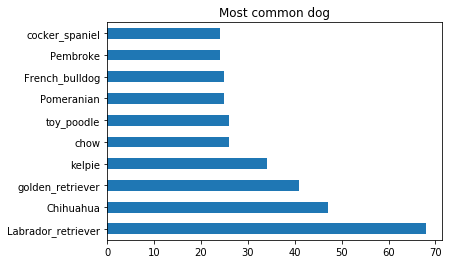

In [534]:
df['dog_type'].value_counts()[:10].plot(kind='barh');
plt.title('Most common dog');

2. Which breed of dog has the most mean rating

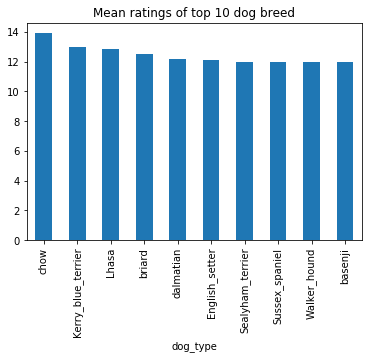

In [553]:
df.groupby('dog_type')['rating'].mean().reset_index(drop=False).sort_values(by='rating',ascending=False)[:10].plot(kind='bar',x='dog_type',legend=False);
plt.title('Mean ratings of top 10 dog breed');

3. Lets analyse the relationship between retweet count and favourite count

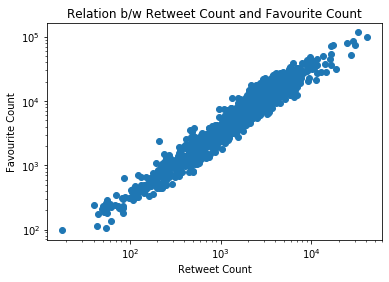

In [565]:
plt.scatter(df['retweet_count'],df['favorite_count'])
xtick = [10,30,100,300,1000,3000]
ytick = [10,30,100,300,1000,3000]
plt.xscale('log');
plt.yscale('log');
plt.xlabel('Retweet Count');
plt.ylabel('Favourite Count');
plt.title('Relation b/w Retweet Count and Favourite Count');

We can see that when retweet count increases the favourite count increases.That means its postive correlation

4. Relationship b/w ratings and retweet counts

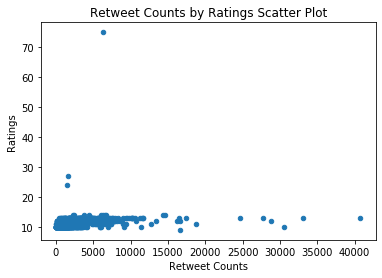

In [571]:
df.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts');
plt.ylabel('Ratings');
plt.title('Retweet Counts by Ratings Scatter Plot');

Low Retweet counts receives low ratings

In [574]:
import pprint
pprint.pprint('WeRateDogs	has	over	6 million	 followers	and	has	received	international	media	coverage. One	of	those	coverage were about	the	quote	“they’re	good	dogs	Brent”,this	was an exchange	in	which	WeRateDogs	shut	down	a	person	having	an issue	with	its rating	system	in humorous	ways.')

('WeRateDogs\thas\tover\t6 million\t followers\tand\thas\treceived\t'
 'international\tmedia\tcoverage. One\tof\tthose\tcoverage were about\tthe\t'
 'quote\t“they’re\tgood\tdogs\tBrent”,this\twas an exchange\tin\twhich\t'
 'WeRateDogs\tshut\tdown\ta\tperson\thaving\tan issue\twith\tits rating\t'
 'system\tin humorous\tways.')


In [577]:
'So	what	does	this	rating	do?	Which	dog	type	(breed)	is	most	common	dog	in	the	tweet	dataset?	What	 dog	 type	 has	 the	 highest	 average	 rating?	 These	 questions	and	more	are	answered	in	the	following	insights:'.replace('\t',' ')

'So what does this rating do? Which dog type (breed) is most common dog in the tweet dataset? What  dog  type  has  the  highest  average  rating?  These  questions and more are answered in the following insights:'